#Tolman-Oppenheimer-Volkov equations

We solve TOV equations with 4th order Runge-Kutta equations.

We need solve the system of equations below:

\begin{equation}
  \frac{dP}{dr} = -G(\rho + P/c^2) \frac{m + 4\pi r^3 P/c^2}{r(r - 2Gm/c^2)} \\
  \frac{dm}{dr} = 4 \pi r^2 \rho \\
  \rho = \rho_0(1 + ɛ/c^2) \\
  \varepsilon = P/(\rho_0(\Gamma - 1))
\end{equation}

The polytropic equation of state is $P = \kappa \rho_0^{\Gamma}$, $\rho_0$ - central density.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def tov_pressure(P, r, rho, m, G = 1, c = 1):
  if r == 0 or m == 0:
    return 0
  eps = 1e-6
  denominator = max(r * (r - 2 * G * m / c**2), eps)
  return -G * (rho + P / c**2) * (m + 4 * np.pi * r**3 * P / c**2) / denominator

def tov_mass(r, rho):
  return 4 * np.pi * r**2 * rho

def eos_pressure(rho0, Gamma, kappa):
  return kappa * rho0**Gamma

def eos_density(P, Gamma, kappa):
  if P <= 1e-10:
    return 0
  return max(0, (P / kappa)**(1 / Gamma))

def energy_density(P, Gamma, rho0, c=1):
  return rho0 + P/(c**2 * (Gamma - 1))

In [ ]:
def rk4(rho_c, Gamma, kappa, dr=0.01, r_max=20):
  n = int(r_max / dr)
  r = np.linspace(dr, r_max, n+1)
  m = np.zeros(n+1); P = np.zeros(n+1); rho = np.zeros(n+1)
  e_density = np.zeros(n+1)
  m[0] = 0
  P[0] = eos_pressure(rho_c, Gamma, kappa)
  rho[0] = rho_c
  e_density[0] = energy_density(P[0], Gamma, rho_c)

  for i in range(n):
    if P[i] <= 1e-10:
      return r[:i+1], m[:i+1], P[:i+1], e_density[:i+1] #pressue is zero at r = R

    k1_m = dr * tov_mass(r[i], e_density[i])
    k1_p = dr * tov_pressure(P[i], r[i], e_density[i], m[i])

    k2_m = dr * tov_mass(r[i] + dr/2, e_density[i])
    k2_p = dr * tov_pressure(P[i] + k1_p/2, r[i] + dr/2, e_density[i], m[i] + k1_m/2)

    k3_m = dr * tov_mass(r[i] + dr/2, e_density[i] + k2_m/2)
    k3_p = dr * tov_pressure(P[i] + k2_p/2, r[i] + dr/2, e_density[i], m[i] + k2_m/2)

    k4_m = dr * tov_mass(r[i] + dr, e_density[i] + k3_m)
    k4_p = dr * tov_pressure(P[i] + k3_p, r[i] + dr, e_density[i], m[i] + k3_m)

    m[i+1] = m[i] + (k1_m + 2*k2_m + 2*k3_m + k4_m) / 6
    P[i+1] = P[i] + (k1_p + 2*k2_p + 2*k3_p + k4_p) / 6
    rho[i+1] = eos_density(P[i], Gamma, kappa)

    e_density[i+1] = energy_density(P[i+1], Gamma, rho[i+1])

  return r, m, P, e_density

In [ ]:
def make_star(rho_c, Gamma, kappa):
  r, m, P, e_density = rk4(rho_c, Gamma, kappa)
  R_max = r[-1]
  M_max = m[-1]

  return r, m, P, e_density, R_max, M_max

We can adjust $\rho_c$, $\Gamma$ and $\kappa$.

In [ ]:
rho_c = 5e-2
Gamma = 2.0
kappa = 100

r, M, P, e_density, R_max, M_max = make_star(rho_c, Gamma, kappa)
print(f'R_max = {R_max} km, M_max = {M_max} M_sun')

R_max = 4.16792 km, M_max = 0.9758313652247875 M_sun


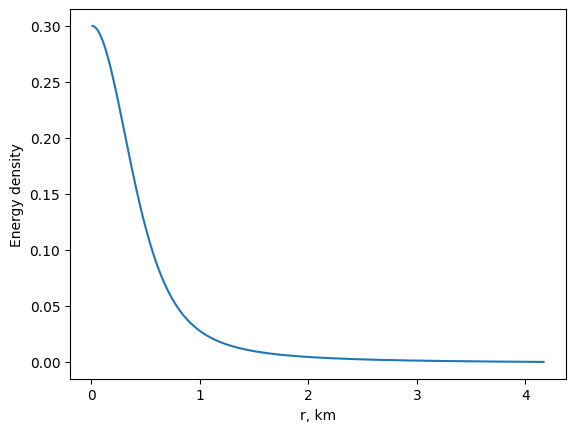

In [ ]:
plt.plot(r, e_density)
plt.xlabel('r, km')
plt.ylabel('Energy density')
plt.show()

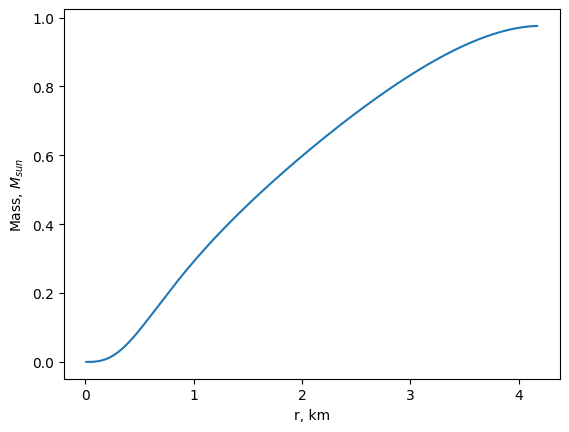

In [ ]:
plt.plot(r, M)
plt.xlabel('r, km')
plt.ylabel('Mass, $M_{sun}$')
plt.show()